In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.vision.all import *
from utils import fpath2points

### Getting the data 

In [3]:
root_dir = Path("data/training")
all_img_paths = get_image_files(root_dir)
data = pd.read_csv("data/training_frames_keypoints.csv")

In [4]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


(303, 288)


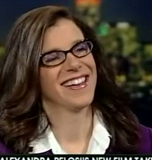

In [5]:
im = PILImage.create(all_img_paths[62])
print(im.shape)
im.to_thumb(160)

In [6]:
faces = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                 get_y=fpath2points,
                 splitter=RandomSplitter(seed=42),
                 item_tfms = Resize(224, method='squish'))

In [7]:
faces.summary('data/training/')

Setting-up type transforms pipelines
Found 3462 items
2 datasets of sizes 2770,692
Setting up Pipeline: PILBase.create
Setting up Pipeline: fpath2points -> TensorPoint.create

Building one sample
  Pipeline: PILBase.create
    starting from
      data/training/Andrea_Bocelli_21.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=249x264
  Pipeline: fpath2points -> TensorPoint.create
    starting from
      data/training/Andrea_Bocelli_21.jpg
    applying fpath2points gives
      Tensor of size 68x2
    applying TensorPoint.create gives
      TensorPoint of size 68x2

Final sample: (PILImage mode=RGB size=249x264, TensorPoint([[ 53., 104.],
             [ 53., 122.],
             [ 53., 137.],
             [ 53., 152.],
             [ 60., 167.],
             [ 71., 185.],
             [ 86., 196.],
             [100., 208.],
             [119., 215.],
             [130., 212.],
             [133., 208.],
             [137., 201.],
             [144., 186.],
             

In [9]:
dls = faces.dataloaders('data/training/', bs=32)

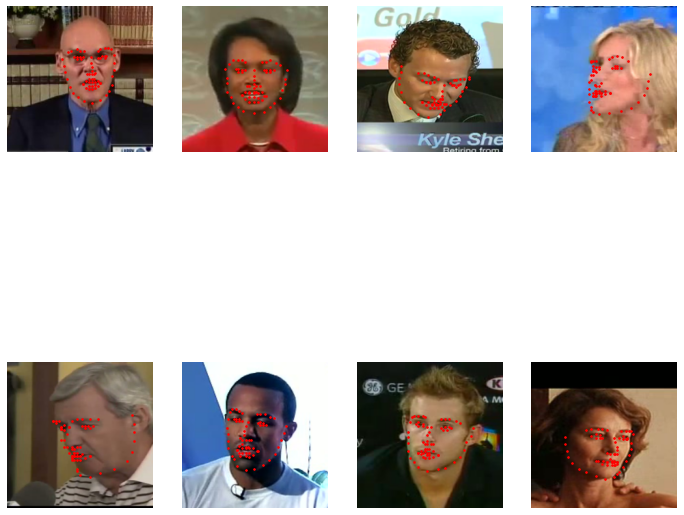

In [10]:
dls.show_batch(max_n=8, figsize=(12, 12))

In [11]:
dls.c = dls.train.after_item.c

In [12]:
dls.c

136

### Learner and model 

In [13]:
learn = vision_learner(dls, vgg16_bn, loss_func=MSELossFlat())

/home/kelwa/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/kelwa/anaconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0020892962347716093)

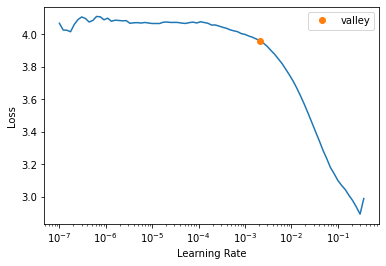

In [14]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,3.306285,0.796868,01:41
1,1.853249,0.292193,01:33
2,1.011194,0.123316,01:38
3,0.657988,0.080378,01:40
4,0.536876,0.073664,01:43


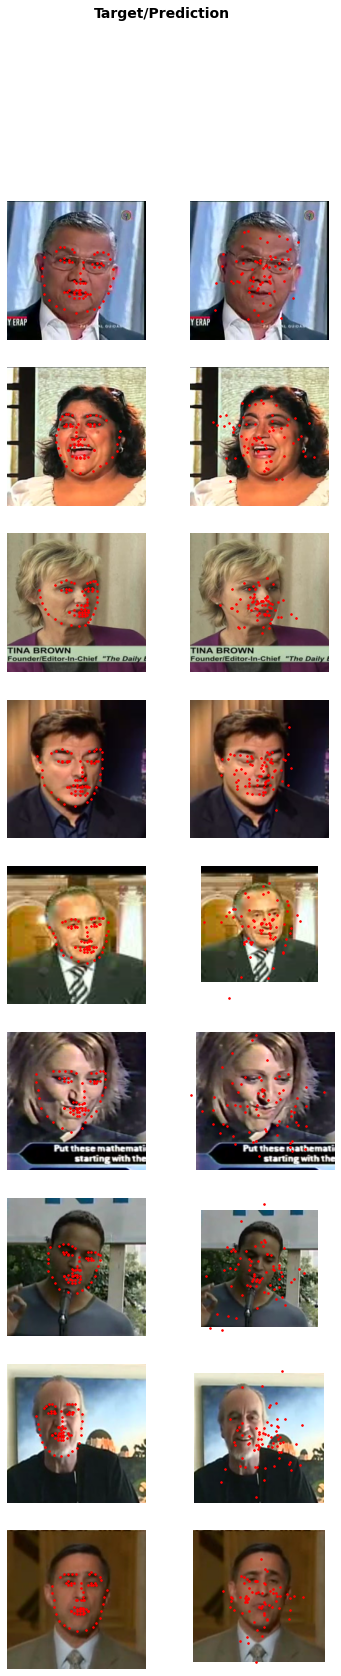

In [18]:
learn.show_results()

SuggestedLRs(valley=0.0006918309954926372)

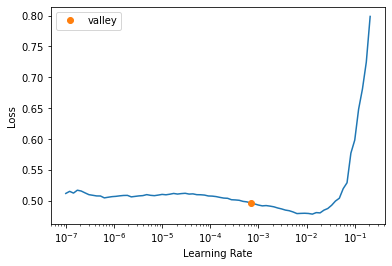

In [19]:
learn.unfreeze()
learn.lr_find()

In [20]:
learn.fit_flat_cos(5, 3e-3)

epoch,train_loss,valid_loss,time
0,0.372240,0.557256,01:44
1,0.207008,0.028464,01:46
2,0.114463,0.033607,01:47
3,0.073889,0.032125,01:48
4,0.046092,0.014204,01:48


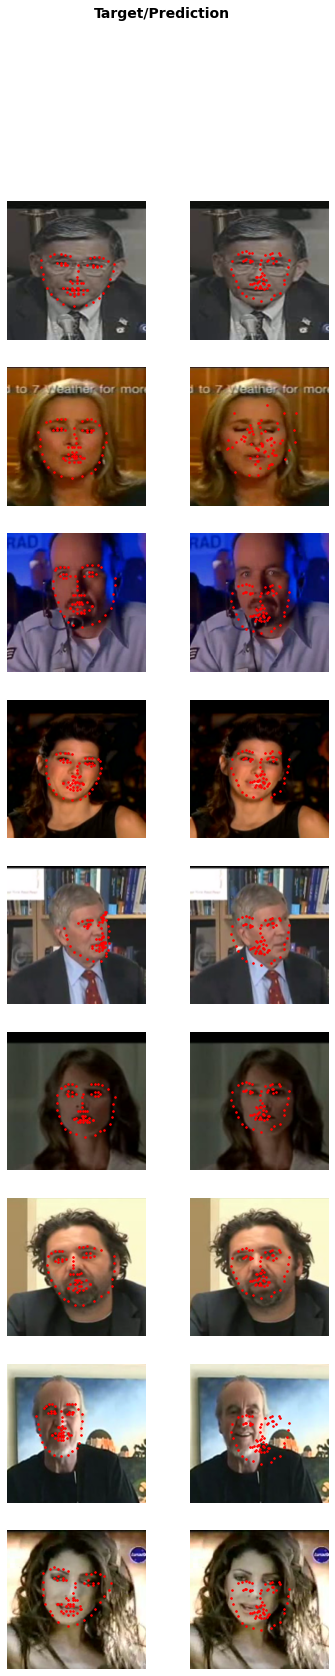

In [21]:
learn.show_results()

In [22]:
learn.fit_flat_cos(20, 3e-3)

epoch,train_loss,valid_loss,time
0,0.034726,0.028336,01:43
1,0.027139,0.019600,01:42
2,0.021983,0.017648,01:43
3,0.019214,0.013061,01:44
4,0.017580,0.012943,01:45
5,0.016028,0.013165,01:44
6,0.015851,0.013815,01:44
7,0.016267,0.013587,01:44
8,0.014931,0.012561,01:45
9,0.013965,0.012374,01:44


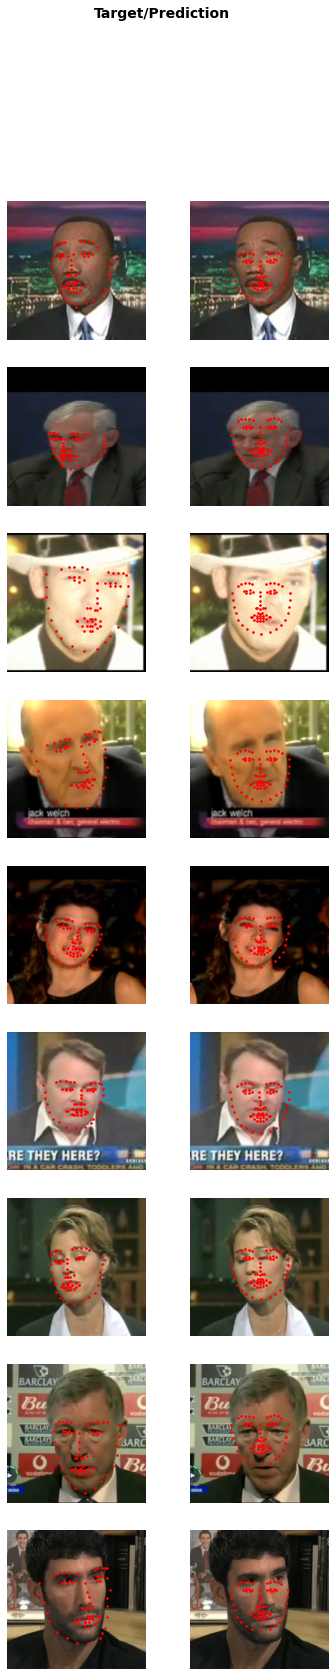

In [23]:
learn.show_results()